# **INFO284 Machine Learning Exam, spring 2025**
## **Task 1 - Sentiment analysis**

# **Load data**

count    515738.000000
mean          8.395077
std           1.637856
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64
115853


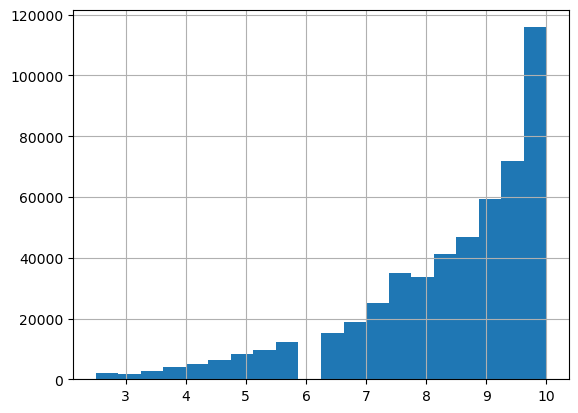

In [ ]:
import pandas as pd

# Read the data into a data frame (pandas) from the csv file
df = pd.read_csv('dataset/Hotel_Reviews.csv')

df.head() # show a overview of the data in the dataset



# Overview of the data

In [ ]:
print(df['Reviewer_Score'].describe()) # show the statistics of the 'Reviewer_Score' column
# make a histogram of the 'Reviewer_Score' column
df['Reviewer_Score'].hist(bins=20) # 20 bins

# print the number of 10.0 scores 
print(df[df['Reviewer_Score'] == 10.0].shape[0])

# CLEANING THE DATA

In [ ]:

# remove 'No Negative' and 'No Positive' from the reviews
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: x.replace('No Negative', ''))
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: x.replace('No Positive', ''))

# merge the two review columns into one
df['Review'] = df['Negative_Review'] + ' ' + df['Positive_Review']

# the target columns are Negative_Review and Positive_Review
df = df[[ 'Review', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']] # select only the columns we need

# remove rows with missing values
df = df.dropna()

df.head() # show a overview of the data in the dataset

,Review,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Reviewer_Score
0,I am so angry that i made this post available...,397,11,2.9
1,No real complaints the hotel was great great...,0,105,7.5
2,Rooms are nice but for elderly a bit difficul...,42,21,7.1
3,My room was dirty and I was afraid to walk ba...,210,26,3.8
4,You When I booked with your company on line y...,140,8,6.7


# Observasjon:

- Kan være nyttig å ta hensyn til forskjeller i antall negative ord og positive ord i en review. Merk at dette ikke er entydig siden det er tydelige eksempler på reviews med 2x negative ord som positive ord, men fortsatt har en relativt høy score (f.eks 7.1). Her må vi enten ta et valg om å fjerne slike rader eller være strenge på hva en positiv review er.
- Vi har en ekstrem overvekt av reviews med en score på 10.0. (115 000 ca). 

# **TODO**

**Dataset exploration and preprocessing**
* find relevant columns
* check the datatypes of the columns - convert if needed
* check for missing values - handle missing values
* check for duplicate rows
* sjekke tekstlikhet (f.eks. nesten like setninger som kan være semantisk like).
* check data distribution (class imbalance, length of text, etc.)
  
**Clean the Text Data: - text preprocessing**
* lowercase text
* Remove Noise: special characters, numbers, punctuation, URLs, HTML tags, Emojis, extra whitespace, etc.
* Tokenization: Split text into words.
* Stopword removal
* Lemmatization/Stemming: gjøre begge men vise og skrive litt tekst ish: "stemming vises her men åpenbart er lemmatization bedre...:"

**Convert Text into Numerical Representation**
* Vectorization of the text - TFIDF greiene, bag of words osv
* prøv ulike måter
* Bag of Words (BoW): Convert text into a numerical representation using word frequency.
* TF-IDF (Term Frequency-Inverse Document Frequency): Weigh words based on their importance in the dataset.
* Word Embeddings: Use pre-trained models like Word2Vec, GloVe, or FastText for contextual meaning.

**Splitting Data for Training and Testing**
* Try different data splits (70/30) etc.

**Model Selection & Training**
* Prøv å justere parametre

**Evaluating models**
* Use multiple metrics, not just accuracy (e.g., F1-score, precision-recall)
* Confusion matrix analysis (to see misclassified examples)